# Datos Yahoo finance
## Importación, Análisis inicial, Pruebas topológicas

### Librerías

In [ ]:
'''

import matplotlib.dates as mdates'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from ripser import ripser
from persim import plot_diagrams
import networkx as nx
from sklearn.datasets import make_circles, make_moons
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
'''import yfinance as yf'''

import importlib

import importacion
importlib.reload(importacion)

<module 'importacion' from 'c:\\Users\\alfmi\\Escritorio\\carrera\\Semestre 7\\Estancia\\Codigo\\A compartir\\importacion.py'>

### Importación

In [25]:
# Stocks a importar 
#stock específico si se quiere analizar uno solo
stock_= "AAPL"
stocks= ["AAPL", "MSFT","AMZN","META"]
inicio= "2010-01-01"
final= "2023-01-01"

In [26]:
# Información financiera

tickers,financials=importacion.tickers_df(stocks)


In [27]:
# Datos históricos


historical_data=importacion.historical(stocks, inicio, final)
historical_data

c:\Users\alfmi\Escritorio\carrera\Semestre 7\Estancia\Codigo\A compartir\importacion.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  if historical_data[stock].index.name is not None and "Ticker" in historical_data[stock].index:
[*********************100%***********************]  1 of 1 completed
c:\Users\alfmi\Escritorio\carrera\Semestre 7\Estancia\Codigo\A compartir\importacion.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  if historical_data[stock].index.name is not None and "Ticker" in historical_data[stock].index:
[*********************100%***********************]  1 of 1 completed
c:\Users\alfmi\Escritorio\carrera\Semestre 7\Estancia\Codigo\A compartir\importacion.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  if historical_data[stock].index.name is not None and "Ticker" in historical_data[stock].index:
[*********************100%***********************]  1 of 1 co

{'AAPL': Price            Close        High         Low        Open     Volume
 Date                                                                 
 2010-01-04    6.424604    6.439314    6.375672    6.407193  493729600
 2010-01-05    6.435713    6.472038    6.401790    6.442318  601904800
 2010-01-06    6.333343    6.461229    6.326738    6.435712  552160000
 2010-01-07    6.321636    6.364265    6.275706    6.356760  477131200
 2010-01-08    6.363664    6.364265    6.276006    6.313230  447610800
 ...                ...         ...         ...         ...        ...
 2022-12-23  130.026230  130.578440  127.837102  129.099300   63814900
 2022-12-27  128.221649  129.582462  126.929870  129.552881   69007800
 2022-12-28  124.287148  129.207749  124.119514  127.866662   85438400
 2022-12-29  127.807526  128.665422  125.953673  126.210052   75703700
 2022-12-30  128.123047  128.142773  125.657822  126.624196   77034200
 
 [3272 rows x 5 columns],
 'MSFT': Price            Close        Hi

In [28]:

# Guardamos cada DataFrame en un CSV
'''for symbol in stocks:
    df = historical_data[symbol]  # Accede al DataFrame por su nombre
    
    df.to_csv(f"{symbol}.csv")'''  # Guarda el DataFrame en un archivo CSV con el nombre del símbolo

'for symbol in stocks:\n    df = historical_data[symbol]  # Accede al DataFrame por su nombre\n    \n    df.to_csv(f"{symbol}.csv")'

In [29]:
'''
for stock in stocks:
    datee = historical_data[stock]
    # Crear línea del tiempo completa (todos los días hábiles)
    fechas_completas = pd.date_range(start=datee.index.min(), end=datee.index.max(), freq='B')

    # Fechas realmente presentes
    fechas_presentes = pd.to_datetime(datee.index)

    # Fechas faltantes
    fechas_faltantes = fechas_completas.difference(fechas_presentes)

    print("Número de días faltantes en", stock, ":", len(fechas_faltantes))
    print("Fechas faltantes en la línea del tiempo:")
    print(fechas_faltantes)

    fig, ax = plt.subplots(figsize=(12, 2))
    ax.scatter(fechas_faltantes, np.ones(len(fechas_faltantes)), color='red', marker='|', s=200, label="Día faltante")

    # Líneas grandes para cada año (incluyendo el primero y el siguiente al último)
    year_start = fechas_completas.min().year
    year_end = fechas_completas.max().year + 1  # Para mostrar el siguiente año al último
    for year in range(year_start, year_end + 1):
        ax.axvline(pd.Timestamp(f"{year}-01-01"), color='black', linestyle='-', linewidth=1.5, alpha=0.7)
        ax.text(pd.Timestamp(f"{year}-01-01"), 1.05, str(year), ha='center', va='bottom', fontsize=9, color='black')

    # Líneas delgadas para cada mes
    for year in range(year_start, year_end):
        for month in range(1, 13):
            ax.axvline(pd.Timestamp(f"{year}-{month:02d}-01"), color='gray', linestyle=':', linewidth=0.5, alpha=0.5)

    # Línea verde para el inicio real de los datos
    ax.axvline(datee.index.min(), color='green', linestyle='--', linewidth=2, label='Inicio real')
    ax.text(datee.index.min(), 1.1, f"Inicio datos\n{datee.index.min().date()}", color='green', ha='left', va='bottom', fontsize=9)

    # Línea roja para el final real de los datos
    ax.axvline(datee.index.max(), color='red', linestyle='--', linewidth=2, label='Fin real')
    ax.text(datee.index.max(), 1.1, f"Fin datos\n{datee.index.max().date()}", color='red', ha='right', va='bottom', fontsize=9)

    ax.set_xlim(fechas_completas.min(), pd.Timestamp(f"{year_end}-01-01"))
    ax.set_yticks([])
    ax.set_xlabel('Fecha')
    ax.set_title(f"Días faltantes en: {stock}")
    plt.tight_layout()
    plt.show()'''


'\nfor stock in stocks:\n    datee = historical_data[stock]\n    # Crear línea del tiempo completa (todos los días hábiles)\n    fechas_completas = pd.date_range(start=datee.index.min(), end=datee.index.max(), freq=\'B\')\n\n    # Fechas realmente presentes\n    fechas_presentes = pd.to_datetime(datee.index)\n\n    # Fechas faltantes\n    fechas_faltantes = fechas_completas.difference(fechas_presentes)\n\n    print("Número de días faltantes en", stock, ":", len(fechas_faltantes))\n    print("Fechas faltantes en la línea del tiempo:")\n    print(fechas_faltantes)\n\n    fig, ax = plt.subplots(figsize=(12, 2))\n    ax.scatter(fechas_faltantes, np.ones(len(fechas_faltantes)), color=\'red\', marker=\'|\', s=200, label="Día faltante")\n\n    # Líneas grandes para cada año (incluyendo el primero y el siguiente al último)\n    year_start = fechas_completas.min().year\n    year_end = fechas_completas.max().year + 1  # Para mostrar el siguiente año al último\n    for year in range(year_start, y

Número de días faltantes en AAPL : 118


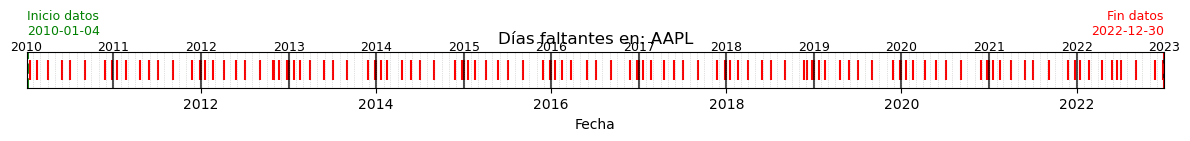

Número de días faltantes en MSFT : 118


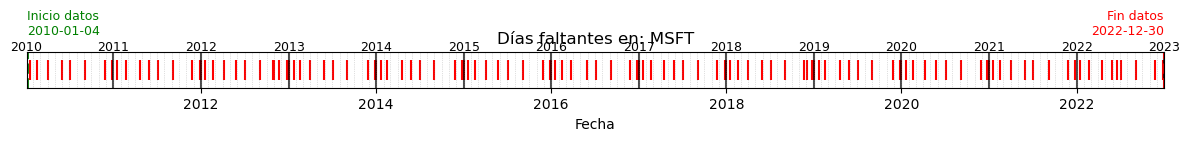

Número de días faltantes en AMZN : 118


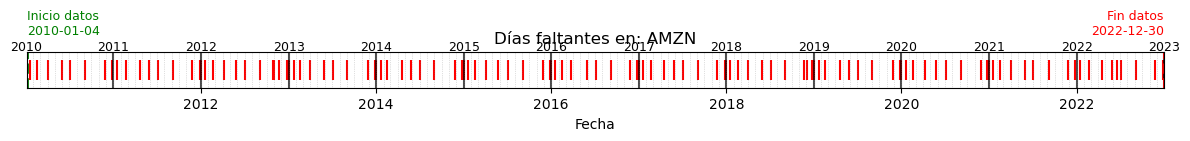

Número de días faltantes en META : 98


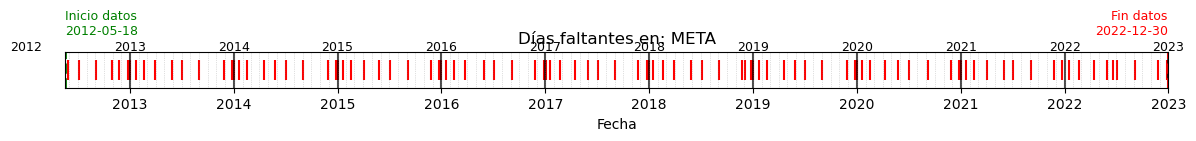

In [30]:
historical_data=importacion.faltantes(historical_data, stocks)

In [34]:
historical_data

{'AAPL':                  Close        High         Low        Open       Volume
 2010-01-04    6.424604    6.439314    6.375672    6.407193  493729600.0
 2010-01-05    6.435713    6.472038    6.401790    6.442318  601904800.0
 2010-01-06    6.333343    6.461229    6.326738    6.435712  552160000.0
 2010-01-07    6.321636    6.364265    6.275706    6.356760  477131200.0
 2010-01-08    6.363664    6.364265    6.276006    6.313230  447610800.0
 ...                ...         ...         ...         ...          ...
 2022-12-26         NaN         NaN         NaN         NaN          NaN
 2022-12-27  128.221649  129.582462  126.929870  129.552881   69007800.0
 2022-12-28  124.287148  129.207749  124.119514  127.866662   85438400.0
 2022-12-29  127.807526  128.665422  125.953673  126.210052   75703700.0
 2022-12-30  128.123047  128.142773  125.657822  126.624196   77034200.0
 
 [3390 rows x 5 columns],
 'MSFT':                  Close        High         Low        Open      Volume
 2010-01

In [38]:
# Función para contar NaN en cada columna de cada DataFrame
def contar_nans_por_columna(historical_data):
    nan_counts = {}
    for stock, df in historical_data.items():
        nan_counts[stock] = df.isna().sum()
    return nan_counts

# Contar NaN en historical_data
nan_counts = contar_nans_por_columna(historical_data)
nan_counts

{'AAPL': Close     118
 High      118
 Low       118
 Open      118
 Volume    118
 dtype: int64,
 'MSFT': Close     118
 High      118
 Low       118
 Open      118
 Volume    118
 dtype: int64,
 'AMZN': Close     118
 High      118
 Low       118
 Open      118
 Volume    118
 dtype: int64,
 'META': Close     98
 High      98
 Low       98
 Open      98
 Volume    98
 dtype: int64}

In [48]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Función para rellenar NaN usando KNNImputer con normalización
def rellenar_nans_knn(historical_data, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    scaler = StandardScaler()
    historical_data_imputed = {}

    for stock, df in historical_data.items():
        # Columnas numéricas y no numéricas
        columnas_numericas = df.select_dtypes(include=["number"])
        columnas_no_numericas = df.select_dtypes(exclude=["number"])

        # Escalar solo columnas numéricas
        scaled_data = scaler.fit_transform(columnas_numericas)

        # Imputar valores faltantes en los datos escalados
        imputed_scaled = imputer.fit_transform(scaled_data)

        # Deshacer la escala para volver a los valores originales
        imputed_data = scaler.inverse_transform(imputed_scaled)

        # Reconstruir DataFrame imputado
        df_imputed = pd.DataFrame(imputed_data, 
                                  columns=columnas_numericas.columns, 
                                  index=df.index)

        # Combinar con las columnas no numéricas
        historical_data_imputed[stock] = pd.concat([df_imputed, columnas_no_numericas], axis=1)

    return historical_data_imputed


# Rellenar los NaN en historical_data
historical_data_imputed = rellenar_nans_knn(historical_data, n_neighbors=20)
print(contar_nans_por_columna(historical_data_imputed))
historical_data_imputed

{'AAPL': Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64, 'MSFT': Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64, 'AMZN': Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64, 'META': Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64}


{'AAPL':                  Close        High         Low        Open        Volume
 2010-01-04    6.424604    6.439314    6.375672    6.407193  4.937296e+08
 2010-01-05    6.435713    6.472038    6.401790    6.442318  6.019048e+08
 2010-01-06    6.333343    6.461229    6.326738    6.435712  5.521600e+08
 2010-01-07    6.321636    6.364265    6.275706    6.356760  4.771312e+08
 2010-01-08    6.363664    6.364265    6.276006    6.313230  4.476108e+08
 ...                ...         ...         ...         ...           ...
 2022-12-26   48.781743   49.305475   48.218966   48.758610  2.562707e+08
 2022-12-27  128.221649  129.582462  126.929870  129.552881  6.900780e+07
 2022-12-28  124.287148  129.207749  124.119514  127.866662  8.543840e+07
 2022-12-29  127.807526  128.665422  125.953673  126.210052  7.570370e+07
 2022-12-30  128.123047  128.142773  125.657822  126.624196  7.703420e+07
 
 [3390 rows x 5 columns],
 'MSFT':                  Close        High         Low        Open        V

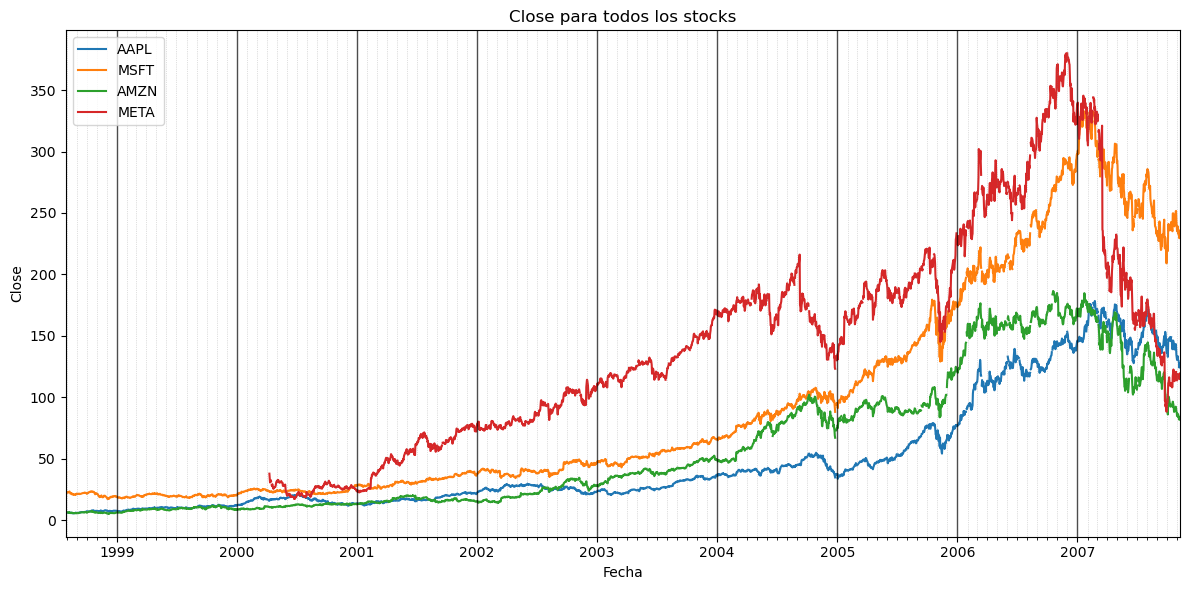

In [40]:
columna = "Close"  # Cambia por "Close", "High", "Low", "Open", "Volume"

importacion.plot_stocks_price(historical_data, stocks, columna)

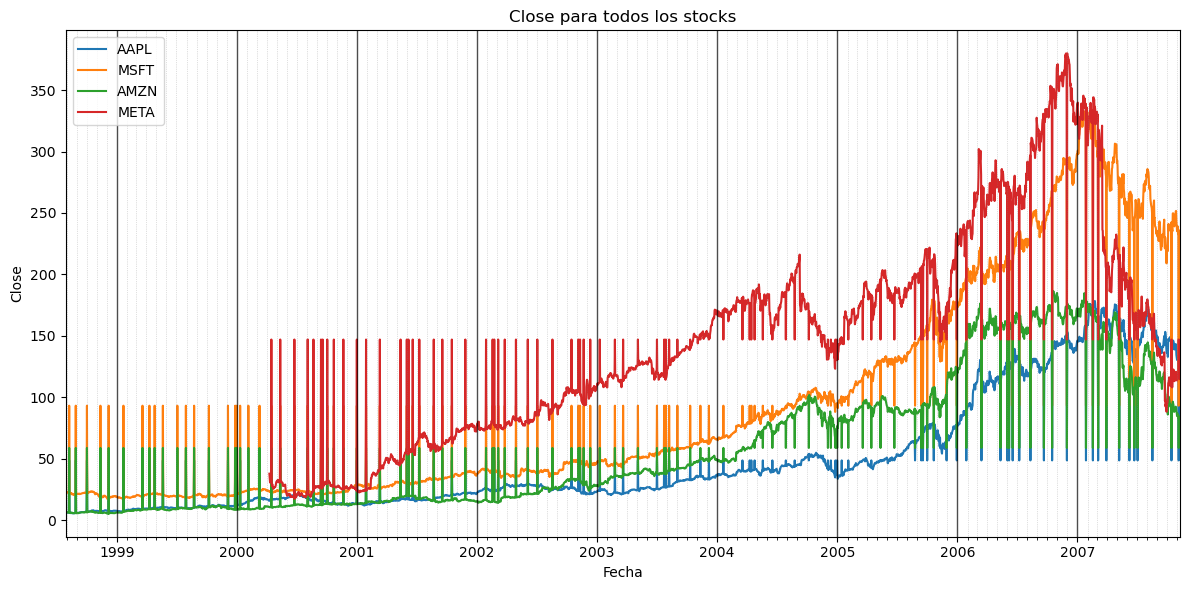

In [49]:
importacion.plot_stocks_price(historical_data_imputed, stocks, columna)

["'Close'", "'High'", "'Low'", "'Open'"]


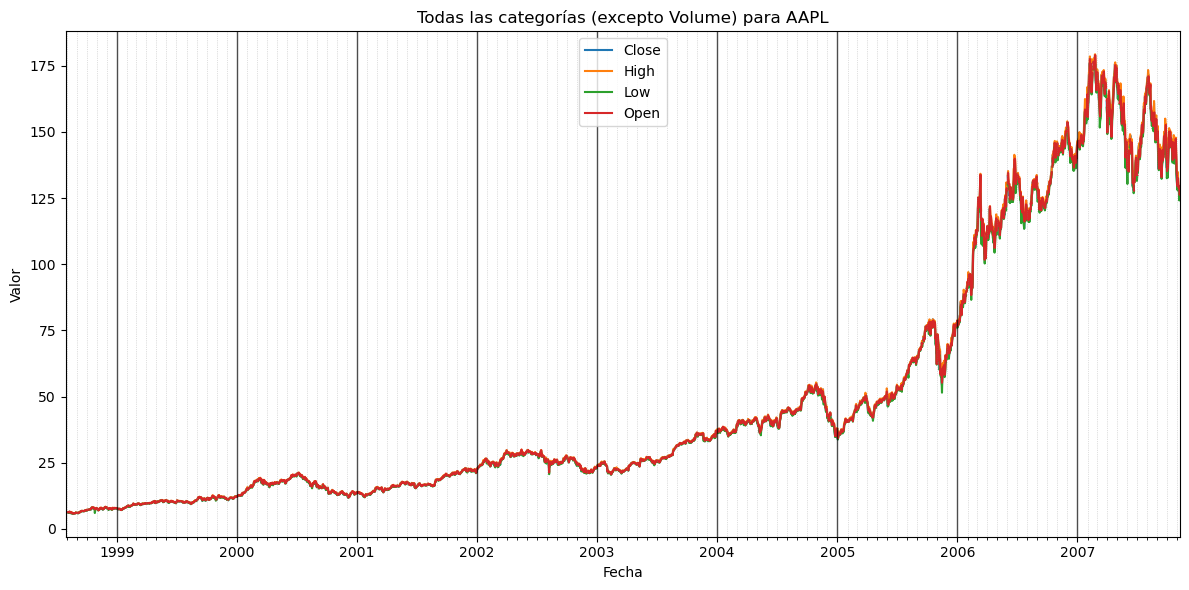

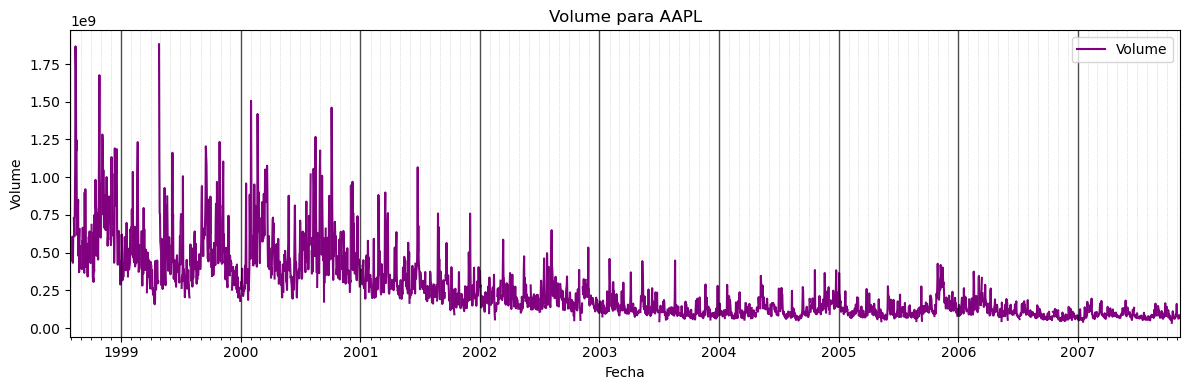

In [37]:
importacion.plot_stock_all_categories(historical_data, stock_)

In [ ]:
# Recargar el módulo para aplicar las correcciones
importlib.reload(importacion)

## Experimentación paper 7